# Explore Crime in Anaheim

# Synopsis

This little project concerns with performing exploratory analysis on criminal arrest log. I decided to do it while staying at my aunt's house in Anaheim, CA. The data obtained from Anaheim Open Data website(http://anaheim.opendata.junar.com/home) and consists of police's arrest log  from May,05 to Jun,04, 2016. Then intend is to do some simple investigation of crimes around my neighborhood and play with Jupyter's markdown functionality. 

# Read in the data file
convert ArrestDate and ArrestTime into a single column "ArrestDateTime" and ensure that datetime columns are read in correctly.

In [80]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plot
import seaborn

data = pd.read_csv("crime05_06.csv",header = None, names = ["LocalRef","ArrestDate",
                                                            "ArrestTime","Charge1Section",
                                                            "LocalCaseNbr","DOB",
                                                            "FullName","Sex","Race"],
                                                            parse_dates = {"ArrestDateTime":["ArrestDate","ArrestTime"]})


data["DOB"] = pd.to_datetime(data["DOB"],format="%m/%d/%Y")

In [81]:
#check that column's type
data.dtypes

ArrestDateTime    datetime64[ns]
LocalRef                  object
Charge1Section            object
LocalCaseNbr              object
DOB               datetime64[ns]
FullName                  object
Sex                       object
Race                      object
dtype: object

# Explore data

In [82]:
data.head()

,ArrestDateTime,LocalRef,Charge1Section,LocalCaseNbr,DOB,FullName,Sex,Race
0,2016-06-04 23:59:00,AB 2016-5471,HS 11377(A),GO 2016-87953,1981-05-08,"GONZALES, VALENTINO",M,H
1,2016-06-04 23:45:00,AB 2016-5470,PC 978.5,GO 2016-87935,1994-06-03,"HERNANDEZ, OSCAR VALENTIN",M,H
2,2016-06-04 23:13:00,AB 2016-5469,HS 11375(B)(2),GO 2016-87887,1996-01-23,"COLLINS, JOSEPH DANIEL",M,B
3,2016-06-04 23:10:00,AB 2016-5468,PC 647(F),GO 2016-87887,1988-07-21,"SOTO, NICHOLAS JOHNATHAN",M,H
4,2016-06-04 22:38:00,AB 2016-5467,PC 978.5,GO 2016-87870,1982-11-20,"LOPEZ, SAMUEL RUMUELDO",M,H


771 arrests occured during around 1 month

In [83]:
data.shape

(771, 8)

# Explore number of arrests, grouped by race

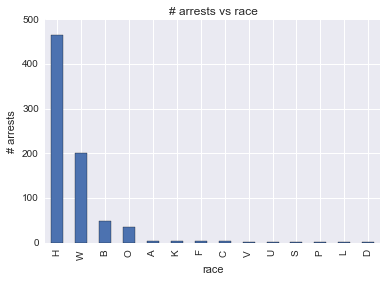

In [84]:
data["Race"].value_counts().plot(kind = "bar",title = "# arrests vs race").set(xlabel = "race",ylabel = "# arrests")


From the hisogram plotted, we can resonably assume that Race "H" means "Hispanic" race - since they are primary settlers in Anaheim, "W" means "White" and "B" likely means "Black". Unfortunately, I can't find the data dictionary so I can't guess beyond these 3 categories("A" probably means "Asian"). 

I decided to focus on these 3 groups

In [85]:
data = data[data["Race"].isin(["H","W","B"])]

data.shape

(713, 8)

# Explore recurring arrests that occured by the same person

In [86]:
(data.groupby("FullName").size().sort_values(ascending=False))[0:10]


FullName
FLORES, JOE ANGEL             4
NAVARRO, ROGELIO              3
HURST, KIMBERLY JEAN          3
LUCERO, JOEY DEAN             3
PLASCENCIA, ANTONIO FLORES    2
PUENTE, FABIAN                2
ALMARAZ, RENE HECTOR          2
STEPHENSON, DENNIS SCOTT      2
ALONZO, ABIGAIL               2
SABROSO, MARIO GUILLERMO      2
dtype: int64

In [87]:
data[data["FullName"] == "FLORES, JOE ANGEL"].sort_values(by = "ArrestDateTime")

,ArrestDateTime,LocalRef,Charge1Section,LocalCaseNbr,DOB,FullName,Sex,Race
282,2016-05-24 21:45:00,AB 2016-4948,PC 647(F),GO 2016-81891,1970-03-27,"FLORES, JOE ANGEL",M,H
144,2016-05-30 02:00:00,AB 2016-5136,PC 594,GO 2016-84702,1970-03-27,"FLORES, JOE ANGEL",M,H
66,2016-06-02 20:39:00,AB 2016-5319,PC 647(F),GO 2016-86708,1970-03-27,"FLORES, JOE ANGEL",M,H
26,2016-06-04 12:35:00,AB 2016-5367,PC 594(B)(2)(A),GO 2016-87588,1970-03-27,"FLORES, JOE ANGEL",M,H


Looks like Mr.Flores is very notorious one, consider that he was arrested for 4 times in just one month.

Searching over the internet, PC 647 case related to an intoxication and PC 594 related to a small vandalism. They pose little penalty and that explains Mr.Flores's recurring capture.



# Explore number of arrests by date & time

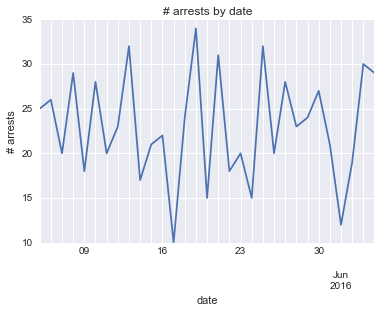

In [88]:
ts = pd.Series(1,index = data["ArrestDateTime"])
ts.resample("D").count().plot(title="# arrests by date").set(xlabel = "date",ylabel = "# arrests")

Explore number of arrests by time of day(0 - 23)

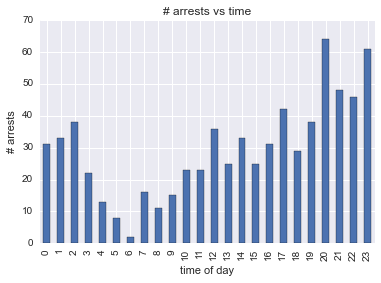

In [89]:
data.groupby(data["ArrestDateTime"].dt.hour).count()["ArrestDateTime"].plot(kind="bar", title = "# arrests vs time").set(xlabel = "time of day",ylabel = "# arrests")


Looks like Anaheim polices prefer to arrest their suspects during night time. It also possible that many cases, such as Mr. Flore's, occured and can be arrested during night time as well.

Number of arrests appears to drop very half of a month, but we need more data to verify that. Unfortunately, the website only provides data of this period.



# Explore number of arrests by age

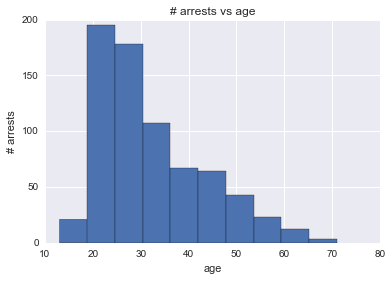

In [90]:
#transform "Date of Birth" to Age
import datetime

data["Age"] = (data["ArrestDateTime"] - data["DOB"]).astype('timedelta64[Y]')
data["Age"].hist().set(title = "# arrests vs age",xlabel = "age",ylabel = "# arrests")

Most are in their early adulthood

# Explore type of crime occured:

In [91]:
data["Charge1Section"].unique()

array(['HS 11377(A)', 'PC 978.5', 'HS 11375(B)(2)', 'PC 647(F)',
       'BP 22435.2(B)', 'PC 148(A)(1)', 'PC 243(E)(1)', 'PC 245(A)(1)',
       'ZZ OAWARR-M', 'ZZ OAWARR-F', 'VC 23152(A)', 'HS 11350(A)',
       'PC 602(K)', 'PC 273.5(A)', 'PC 3056', 'PC 242', 'PC 594(B)(2)(A)',
       'VC 14601.1(A)', 'HS 11550(A)', 'HS 11364(A)', 'PC 602(O)',
       'PC 240', 'PC 459', 'VC 10851(A)', 'PC 647(H)', 'PC 488',
       'BP 22435.2(F)', 'VC 20002(A)', 'HS 11378', 'PC 459.5',
       'PC 602(L)(1)', 'PC 211', 'PC 236.1(B)', 'PC 148.9(A)', 'PC 3455',
       'PC 487(D)', 'PC 3455(A)(4)', 'PC 422', 'PC 594', 'PC 314.1',
       'PC 594.2(A)', 'PC 1203.2', 'PC 243(D)', 'PC 594(B)(1)',
       'VC 22520.5(A)', 'AC 4.20.030', 'VC 2800.1(A)', 'PC 3454(C)',
       'PC 186.22(A)', 'PC 21810', 'PC 236', 'HS 11351', 'PC 487(A)',
       'PC 409', 'PC 417(A)(1)', 'PC 594(A)(2)', 'AC 7.16.040.010',
       'AC 4.10.010.010', 'PC 484E(C)', 'VC 12500(A)', 'PC 602(M)',
       'PC 166(C)(1)', 'VC 23152(E)', 'PC 46

"Charge1Section" categorizes crime by section and sub-section(for example PC 594 and PC 594(B)(1) belong to the small vandalism, with a bit different degree of penalty). I would like to look at their primary section instead.

In [92]:
#group Charge1Section by their primary Charge code
import re
def cutSubSection(x):
    matched = re.search("[\(-]",x)
    if matched:
        index = matched.start()    
        return x[:index]
    return x
    
data["Charge1Section"] = [cutSubSection(x) for x in data["Charge1Section"]]
data["Charge1Section"].unique()

array(['HS 11377', 'PC 978.5', 'HS 11375', 'PC 647', 'BP 22435.2',
       'PC 148', 'PC 243', 'PC 245', 'ZZ OAWARR', 'VC 23152', 'HS 11350',
       'PC 602', 'PC 273.5', 'PC 3056', 'PC 242', 'PC 594', 'VC 14601.1',
       'HS 11550', 'HS 11364', 'PC 240', 'PC 459', 'VC 10851', 'PC 488',
       'VC 20002', 'HS 11378', 'PC 459.5', 'PC 211', 'PC 236.1',
       'PC 148.9', 'PC 3455', 'PC 487', 'PC 422', 'PC 314.1', 'PC 594.2',
       'PC 1203.2', 'VC 22520.5', 'AC 4.20.030', 'VC 2800.1', 'PC 3454',
       'PC 186.22', 'PC 21810', 'PC 236', 'HS 11351', 'PC 409', 'PC 417',
       'AC 7.16.040.010', 'AC 4.10.010.010', 'PC 484E', 'VC 12500',
       'PC 166', 'PC 466', 'PC 273A', 'PC 273D', 'PC 273.6', 'AC 7.16.060',
       'PC 602.1', 'PC 21310', 'VC 23103', 'PC 496', 'PC 485', 'PC 288',
       'PC 241', 'VC 21200.5', 'BP 25662', 'PC 29800', 'PC 537',
       'HS 11379', 'PC 25850', 'HS 11370.1', 'HS 11352', 'PC 215',
       'VC 2800.2', 'PC 187', 'PC 266H', 'PC 182', 'PC 21510', 'PC 381B',
   

Explore number of occurences of each Charge Type

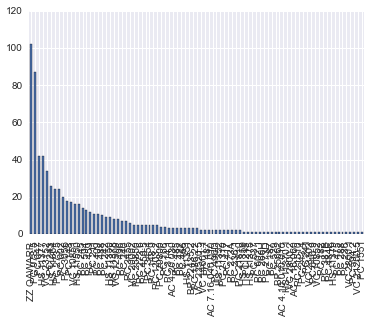

In [93]:
data["Charge1Section"].value_counts().plot(kind = "bar")


Looking at only first 15 Charge Type

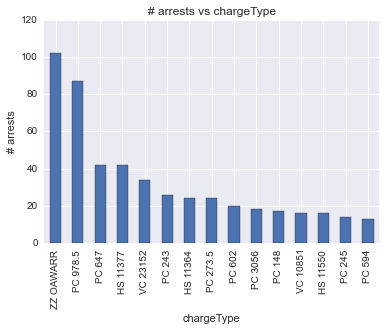

In [94]:
data["Charge1Section"].value_counts()[0:15].plot(kind = "bar").set(title = "# arrests vs chargeType", xlabel = "chargeType",ylabel = "# arrests")


The most occuring case is "ZZ OAWARR". It apparently relates to mugshot but I can't find the exact definition.
<br/>
The next 4 most occuring cases:
<br/>
PC 978.5 - A warrant on person who fail to appear in court(possibly relates to mugshot and "ZZ OAWARR"?)
<br/>
PC 647 - Miscellaneous Offenses: soliciting, sexual harassment, voyeur, etc.
<br/>
HS 11377 - Possession of controlled substance.
<br/>
VC 23152 - Driving during intoxication.

# Explore dependent of variables

Chi-square test is performed to find dependency of any 2 category variables


In [95]:
#categorize age
def binAge(age):
    if(age < 10 ):
        return "child"
    if(age < 20 ):
        return "teenager"
    if(age < 30 ):
        return "early_adult"
    if(age < 50 ):
        return "adult"
    if(age < 60 ):
        return "early_senior"
    if(age < 70 ):
        return "senior"
    return "elder" 
    
data["AgeStatus"] = [binAge(x) for x in data["Age"]] 
data.head()

,ArrestDateTime,LocalRef,Charge1Section,LocalCaseNbr,DOB,FullName,Sex,Race,Age,AgeStatus
0,2016-06-04 23:59:00,AB 2016-5471,HS 11377,GO 2016-87953,1981-05-08,"GONZALES, VALENTINO",M,H,35.0,adult
1,2016-06-04 23:45:00,AB 2016-5470,PC 978.5,GO 2016-87935,1994-06-03,"HERNANDEZ, OSCAR VALENTIN",M,H,22.0,early_adult
2,2016-06-04 23:13:00,AB 2016-5469,HS 11375,GO 2016-87887,1996-01-23,"COLLINS, JOSEPH DANIEL",M,B,20.0,early_adult
3,2016-06-04 23:10:00,AB 2016-5468,PC 647,GO 2016-87887,1988-07-21,"SOTO, NICHOLAS JOHNATHAN",M,H,27.0,early_adult
4,2016-06-04 22:38:00,AB 2016-5467,PC 978.5,GO 2016-87870,1982-11-20,"LOPEZ, SAMUEL RUMUELDO",M,H,33.0,adult


In [96]:
#perform Chi-square test
from scipy.stats import chi2_contingency

def chisqTest(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

columns = ["Charge1Section","Sex","Race","AgeStatus"]
for idx,column in enumerate(columns):
    for j in range(idx+1,len(columns)):
        pValue = chisqTest(data,column,columns[j])[1]
        print("variable {0} and {1} has p-value:{2}".format(column,columns[j],pValue))


variable Charge1Section and Sex has p-value:0.812440960504
variable Charge1Section and Race has p-value:4.2847917206e-05
variable Charge1Section and AgeStatus has p-value:0.970841539614
variable Sex and Race has p-value:0.00109622917005
variable Sex and AgeStatus has p-value:0.44512982122
variable Race and AgeStatus has p-value:1.71575258214e-11


Data appear to have a relationship between Charge1Section & Race, Sex & Race, Race & AgeStatus/Age

Let's explore each

1) Occurence of each chargeType, according to each race

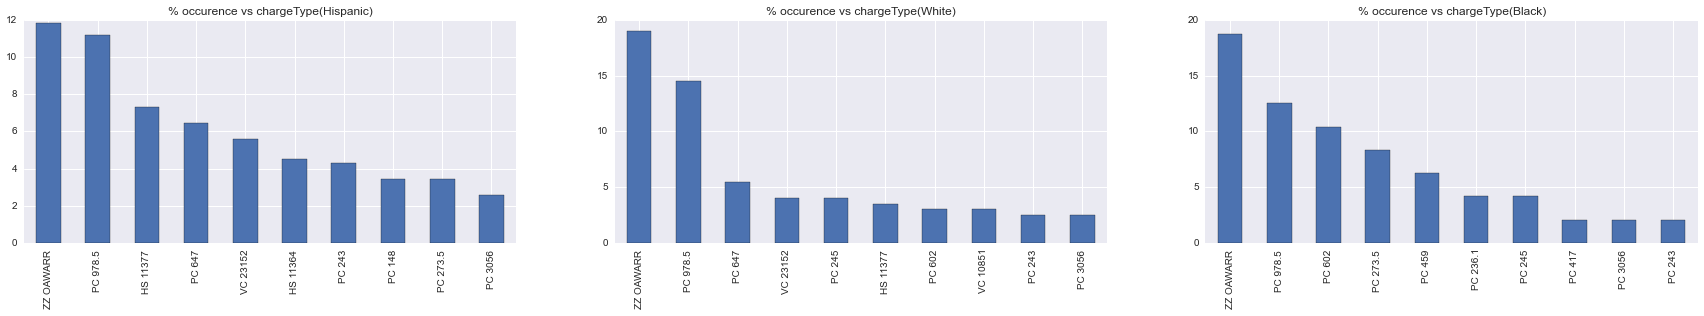

In [97]:
import matplotlib.figure as figure

plot.subplot(131)  
plot.subplots_adjust(right = 4)
total_record = data[data["Race"]=="H"].shape[0]
counts = data[data["Race"]=="H"]["Charge1Section"].value_counts() * 100.0/ total_record
counts[0:10].plot(kind = "bar",title = "% occurence vs chargeType(Hispanic)")

plot.subplot(132)
total_record = data[data["Race"]=="W"].shape[0]
counts = data[data["Race"]=="W"]["Charge1Section"].value_counts()  * 100.0 / total_record
counts[0:10].plot(kind = "bar",title = "% occurence vs chargeType(White)")

plot.subplot(133)
total_record = data[data["Race"]=="B"].shape[0]
counts = data[data["Race"]=="B"]["Charge1Section"].value_counts()  * 100.0 / total_record
counts[0:10].plot(kind = "bar",title = "% occurence vs chargeType(Black)")


2) Number of arrested male and female, according to their race

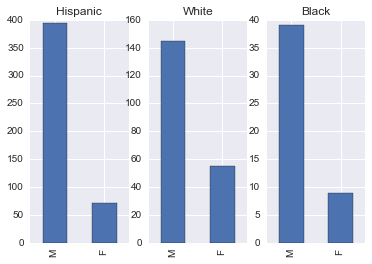

In [98]:
plot.subplot(131) 
data[data["Race"]=="H"]["Sex"].value_counts().plot(kind = "bar",title = "Hispanic")
plot.subplot(132) 
data[data["Race"]=="W"]["Sex"].value_counts().plot(kind = "bar",title = "White")  
plot.subplot(133) 
data[data["Race"]=="B"]["Sex"].value_counts().plot(kind = "bar",title = "Black")  


3) Number of person in each age that are arrested, according to their race

array([[<matplotlib.axes.AxesSubplot object at 0x7f63d61e8310>,
        <matplotlib.axes.AxesSubplot object at 0x7f63d5ff0590>]], dtype=object)

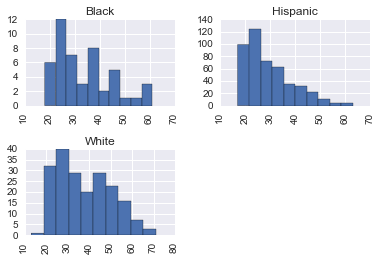

In [99]:
data.hist(column = "Age",by = data["Race"].map(lambda x: "Hispanic" if x == "H" else ("White" if x == "W" else "Black") ))


We observe that:
<br/>
(1) ZZ OAWARR and PC 978.5 are the most common charge case across 3 races, but Hispanic tend to commit both equally.
<br/>
(2) White female has slightly higher proportion of being arrested, compare to female in another 2 races.
<br/>
(3) While a large portion of person who are arrested are early-adult(age 20 - 30), the distribution of White arrestees is more uniform from across age 20 to 50